In [1]:
from geopy.geocoders import Nominatim
import pprint
import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon

In [3]:
with open('../data/country_vs_names.log') as f:
    data = eval(f.read())

In [14]:
#This cell can take some time to run due to the geocoder library

country_data = {
    'Country': [],
    'Latitude': [],
    'Longitude': [],
    'Names': []
}

geolocator = Nominatim(user_agent="CS492")

for country, count in data:
    location = geolocator.geocode(country)
    
    if location:
        country_data['Country'].append(country)
        country_data['Latitude'].append(location.latitude)
        country_data['Longitude'].append(location.longitude)
        country_data['Names'].append(count)

In [29]:
df = pd.DataFrame(country_data)

In [30]:
df.head()

,Country,Latitude,Longitude,Names
0,United States,39.783730,-100.445882,3264
1,France,46.603354,1.888334,2148
2,Italy,42.638426,12.674297,1428
3,Germany,51.083420,10.423447,743
4,Brazil,-10.333333,-53.200000,459


In [49]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = geopandas.GeoDataFrame(df, geometry = 'Coordinates')

In [38]:
gdf.head()

,Country,Latitude,Longitude,Names,Coordinates
0,United States,39.783730,-100.445882,3264,POINT (-100.4458825 39.7837304)
1,France,46.603354,1.888334,2148,POINT (1.8883335 46.603354)
2,Italy,42.638426,12.674297,1428,POINT (12.674297 42.6384261)
3,Germany,51.083420,10.423447,743,POINT (10.4234469 51.0834196)
4,Brazil,-10.333333,-53.200000,459,POINT (-53.2 -10.3333333)


In [57]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {'name':'Country'}, inplace = True)
world.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [66]:
country_data = pd.merge(world, gdf, on = 'Country')
country_data = country_data.drop(['pop_est', 'continent', 'iso_a3','gdp_md_est'], axis=1)
country_data.head()

,Country,geometry,Latitude,Longitude,Names,Coordinates
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",33.768006,66.238514,55,POINT (66.2385139 33.7680065)
1,Angola,(POLYGON ((16.32652835456705 -5.87747039146621...,-11.877577,17.569124,2,POINT (17.5691241 -11.8775768)
2,Albania,"POLYGON ((20.59024743010491 41.85540416113361,...",41.000028,19.999962,6,POINT (19.9999619 41.000028)
3,United Arab Emirates,"POLYGON ((51.57951867046327 24.24549713795111,...",24.000249,53.999483,23,POINT (53.9994829 24.0002488)
4,Argentina,(POLYGON ((-65.50000000000003 -55.199999999999...,-34.996496,-64.967282,194,POINT (-64.9672817 -34.9964963)


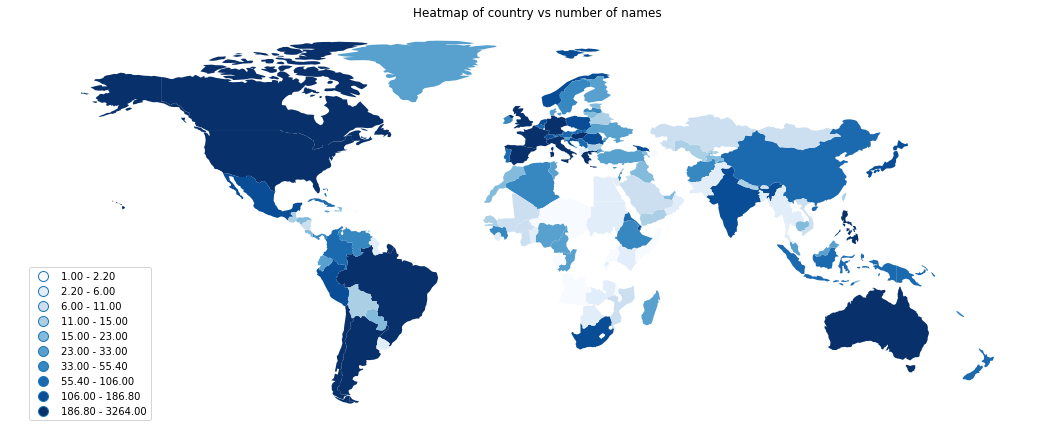

In [107]:
ax = country_data.plot(column='Names', cmap='Blues', figsize = (18,12), legend = True, scheme = 'quantiles', k = 10)
ax.set_title('Heatmap of country vs number of names')
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_axis_off()

In [77]:
country_data = country_data.sort_values('Names', ascending = False)
country_data.head()

,Country,geometry,Latitude,Longitude,Names,Coordinates
126,United States,"(POLYGON ((-155.54211 19.08348000000001, -155....",39.783730,-100.445882,3264,POINT (-100.4458825 39.7837304)
43,France,(POLYGON ((-52.55642473001839 2.50470530843705...,46.603354,1.888334,2148,POINT (1.8883335 46.603354)
63,Italy,(POLYGON ((15.52037601081383 38.23115509699147...,42.638426,12.674297,1428,POINT (12.674297 42.6384261)
32,Germany,"POLYGON ((9.921906365609232 54.98310415304803,...",51.083420,10.423447,743,POINT (10.4234469 51.0834196)
19,Brazil,POLYGON ((-57.62513342958296 -30.2162948544542...,-10.333333,-53.200000,459,POINT (-53.2 -10.3333333)


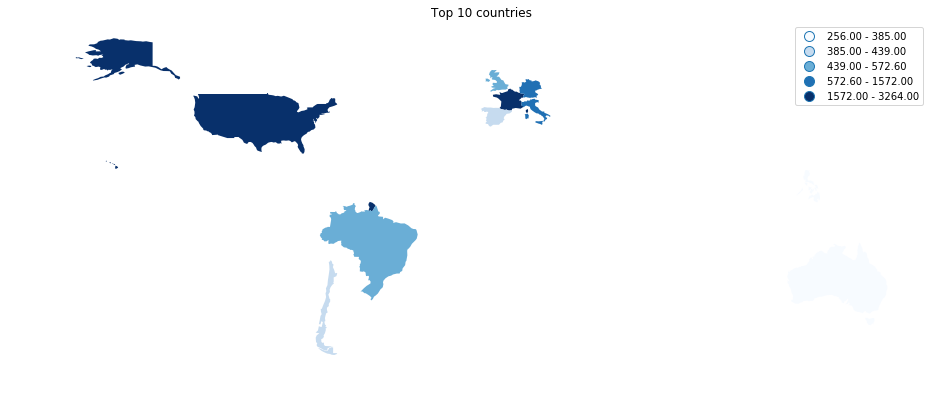

In [108]:
ax = country_data.head(10).plot(column='Names', cmap='Blues', figsize = (16,10), legend = True, scheme = 'quantiles', k = 5)
ax.set_title('Top 10 countries')
ax.set_axis_off()